In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url="./Expanded_data_with_more_features.csv"
df=pd.read_csv(url) # Read the data
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [4]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [5]:
df1=df.groupby(["Gender","MathScore","ReadingScore","WritingScore"]).size().reset_index(name="Count")
df1.head()

,Gender,MathScore,ReadingScore,WritingScore,Count
0,female,0,17,10,1
1,female,8,24,23,1
2,female,9,23,20,1
3,female,9,26,27,1
4,female,9,31,29,1


In [6]:
df2=df1.query("Gender ==  'female'")
df2.head()

,Gender,MathScore,ReadingScore,WritingScore,Count
0,female,0,17,10,1
1,female,8,24,23,1
2,female,9,23,20,1
3,female,9,26,27,1
4,female,9,31,29,1


In [7]:
df2.describe()

,MathScore,ReadingScore,WritingScore,Count
count,10826.000000,10826.000000,10826.000000,10826.000000
mean,63.237207,71.930076,71.959265,1.424718
std,15.950961,14.901952,15.294404,0.885038
min,0.000000,16.000000,10.000000,1.000000
25%,52.000000,61.000000,61.000000,1.000000
50%,64.000000,73.000000,73.000000,1.000000
75%,75.000000,84.000000,84.000000,2.000000
max,100.000000,100.000000,100.000000,25.000000


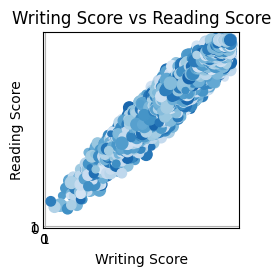

In [8]:

plt.style.use('_mpl-gallery')

fig, ax=plt.subplots()

x=df1["WritingScore"]
y=df1["ReadingScore"]

# size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

ax.scatter(x,y, s=sizes ,c=colors, vmin=0,vmax=100)

ax.set(xlim=(0.8), xticks=np.arange(1.8),
       ylim=(0.8), yticks=np.arange(1.8))

ax.set_xlabel("Writing Score")
ax.set_ylabel("Reading Score")
ax.set_title("Writing Score vs Reading Score")

plt.show()


En el gráfico se puede ver que la mayor cantidad de alumnos, tiene un math entre 60 y 70 puntos , donde esta la mayor concentración de los datos.

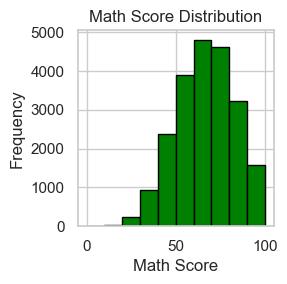

In [25]:
plt.hist(df1["MathScore"], bins=10, color="green", edgecolor="black")
plt.xlabel("Math Score")
plt.ylabel("Frequency")
plt.title("Math Score Distribution")
plt.show()

In [10]:
mean_female=df1.query("Gender == 'female'")["WritingScore"].mean()
mean_male=df1.query("Gender == 'male'")["WritingScore"].mean()

print(mean_female)
print(mean_male)

71.95926473305006
63.68600275355668


En este gráfico demuestra que la media score de lectura, el género femenino tiene la misma un pco mas alta.

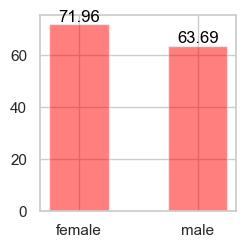

In [24]:



df3=pd.DataFrame({
"Gender": ["female","male"],
"WritingScore": [mean_female,mean_male]

})

fig, barra= plt.subplots()


barra.bar(df3["Gender"],df3["WritingScore"], color="red", label="Writing Score", width=0.5, align="center", alpha=0.5)

# Agregamos las etiquetas de datos a las barras
for i, v in enumerate(df3["WritingScore"].round(2)):
    barra.text(i, v + 1, str(v), color="black", ha="center")


plt.show()

En el proximo gráfico se puede ver como el deporte, segun este informe, tiene mucha influencia en el rendimiento de los alumnos en los exámenes. Se ve este compartamiento en ambos generos. 
En los hombres se puede apreciar un poco mas la diferencia

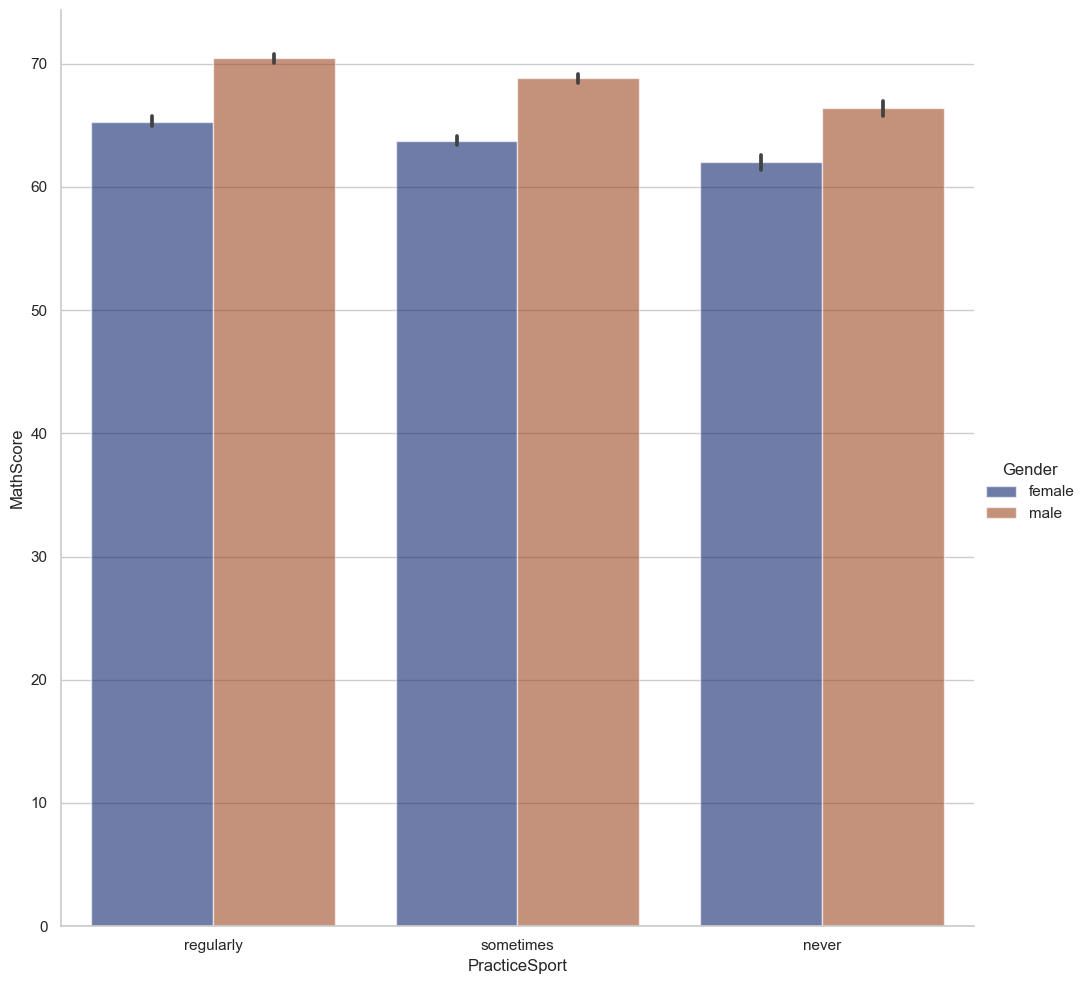

In [21]:
sns.catplot(data=df, kind="bar", x="PracticeSport", y="MathScore", hue="Gender", palette="dark", alpha=.6, height=10)

Las horas de estudio, segun este estudio, a mayor cantidad de horas de estudios mejora la cantidad de Math en los exámenes.

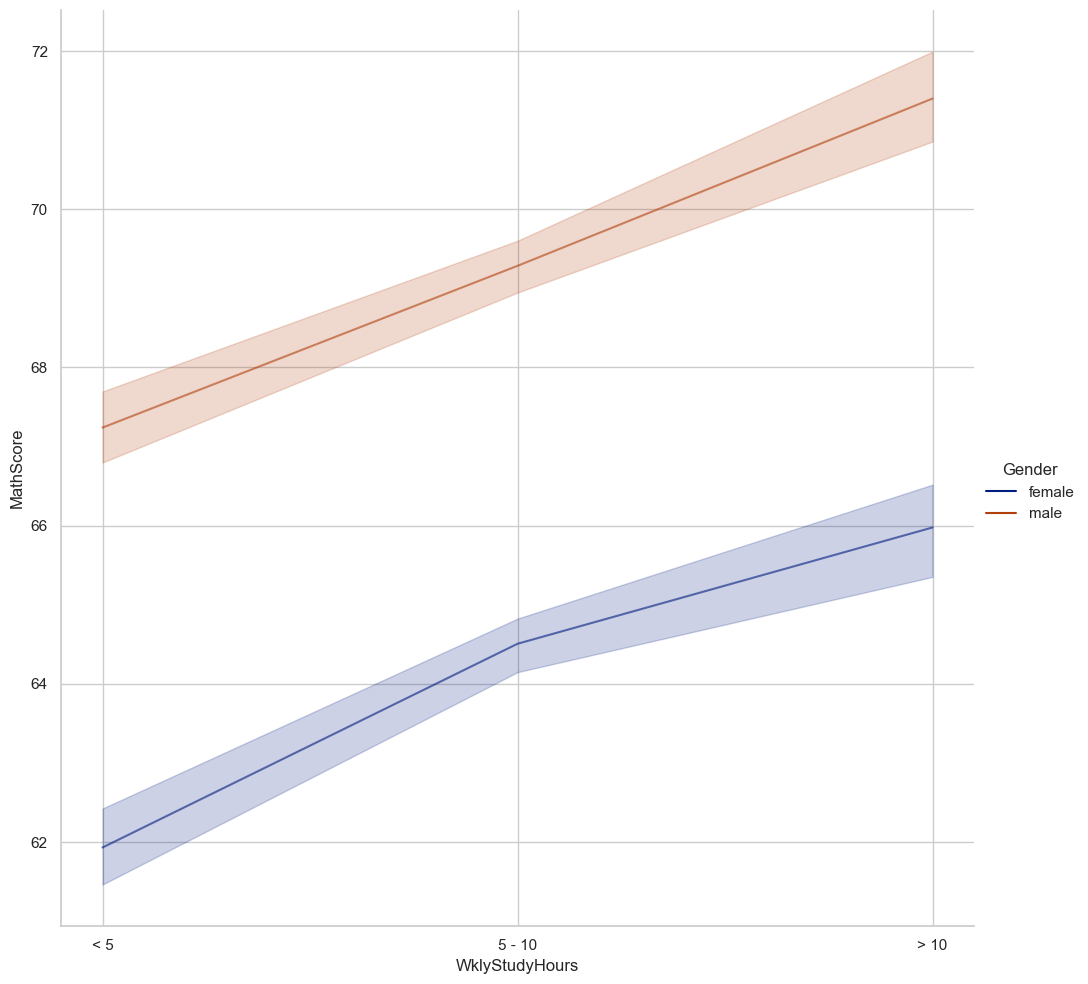

In [29]:
sns.relplot(data=df, kind="line", x="WklyStudyHours", y="MathScore", hue="Gender", palette="dark", alpha=.6, height=10)

Demuestra que tanto el score de escritura y de lectura son muy simalares (casi mismo puntaje en ambos). 

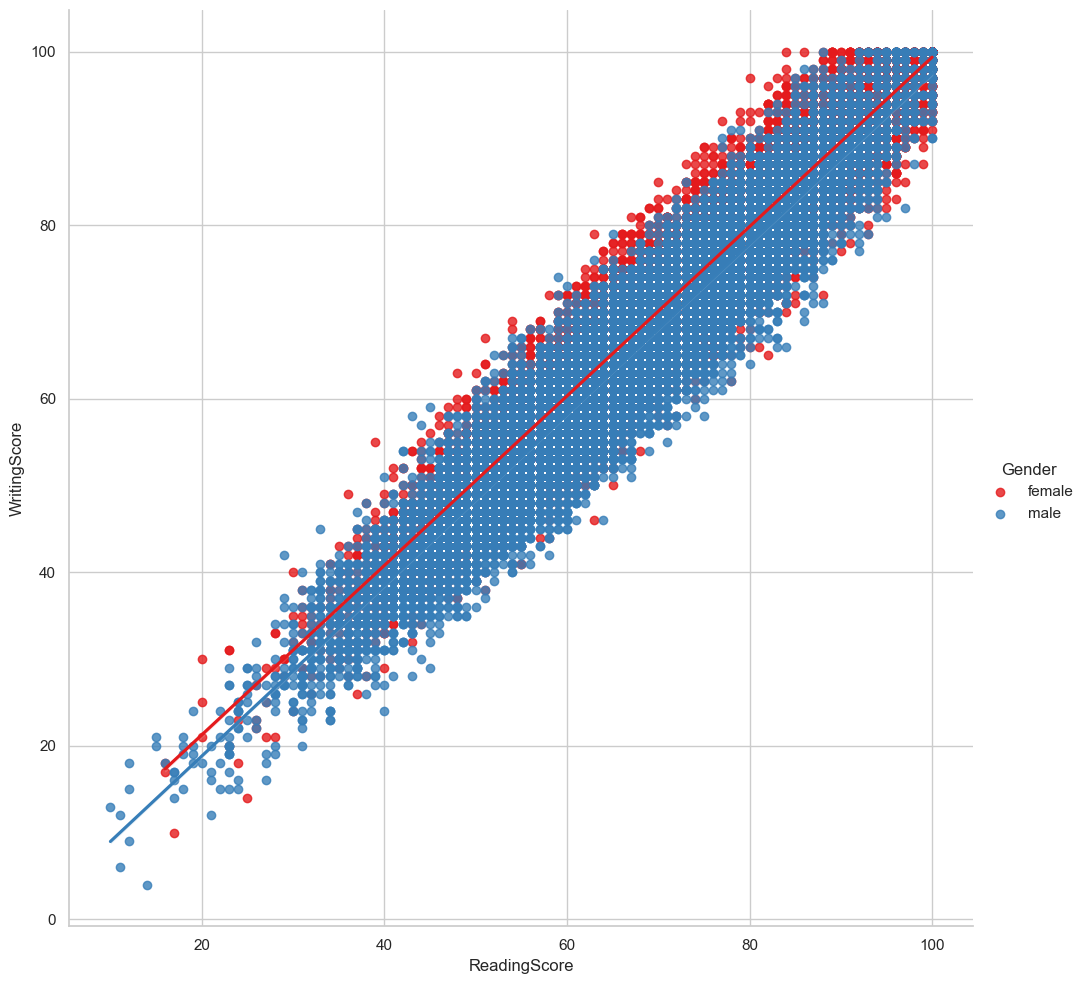

In [19]:
sns.lmplot(data=df, x="ReadingScore", y="WritingScore", hue="Gender", palette="Set1", height=10)